Hello,

The purpose of this notebook is to develop a classifier and assess its performance using precision and recall using the basic python functions. This allows to know how to deal with a classifier in a very basic way before using the ones that are available in packages like Sklearn. If you are like me, then you can use that notebook as a playground to learn more about classification.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


The next commands would be to get the data and then check is there is any missing values.

In [2]:
data = pd.read_csv(os.path.join(dirname, filename))
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We have all the data and there is no missing values. Now let's take a look at some rows.

In [3]:
data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
110291,71758.0,-0.981623,1.179700,2.354414,2.861293,-0.643394,1.523614,-0.736756,1.184768,-0.650505,...,-0.115250,-0.209872,-0.148588,-0.368816,-0.033526,0.253904,0.247233,0.076125,0.00,0
200465,133445.0,-1.413866,0.823777,0.163561,0.555815,1.010344,-0.366801,1.279083,0.274590,-1.482896,...,0.227546,0.305918,-0.413007,-0.376086,1.276743,-0.287530,-0.125477,-0.096294,103.99,0
156695,108714.0,1.987671,0.364617,-1.935703,1.442930,0.884284,-0.639532,0.321320,-0.413315,1.497606,...,0.025609,0.380885,-0.199043,-1.143207,0.419687,-0.403139,-0.014083,-0.029424,59.70,0
190322,128783.0,1.883813,-1.067891,-1.466164,-0.376472,-0.443009,-0.345062,-0.296255,-0.123503,-0.524282,...,0.073990,0.529137,-0.043762,0.709971,0.130667,-0.081073,-0.018328,-0.036152,129.97,0
117803,74817.0,-0.288175,-0.423732,1.662529,-2.552175,-0.880237,-0.381990,-0.289321,0.022276,-2.591169,...,-0.199807,-0.350565,0.087478,-0.042834,-0.501201,-0.607699,0.139791,0.140489,37.72,0
178130,123489.0,1.798185,-0.501828,-3.320092,-0.506791,2.568549,3.053871,-0.213452,0.692109,0.425054,...,0.270116,0.545068,-0.092879,0.643358,0.242676,-0.094072,-0.007417,-0.015621,130.71,0
160541,113445.0,1.992740,0.118707,-1.762028,0.569877,0.448451,-0.500887,0.001267,-0.100348,0.411793,...,0.027881,0.364596,0.052168,0.719717,0.104738,0.579504,-0.043828,-0.030517,6.99,0
84856,60491.0,1.170472,0.086719,0.020009,1.219428,0.222000,0.307047,0.076951,0.039808,0.367297,...,-0.141979,-0.237572,-0.188344,-0.748774,0.760217,-0.263189,0.032606,0.012018,36.00,0
94768,65022.0,1.356613,-0.837519,1.127833,-0.484792,-1.717830,-0.524643,-1.224938,0.071093,0.071152,...,0.294788,0.872779,-0.089629,0.420114,0.419484,-0.043114,0.042671,0.023294,10.00,0
182776,125544.0,-0.947013,-0.769388,-0.099135,0.615050,-0.326349,1.339084,-0.465960,-2.632728,-2.037082,...,-1.461248,-0.612479,-0.735656,0.268053,1.599752,-0.283618,-0.034670,0.238914,443.42,0


To develop a classifier, we need to find an elements that is different between the two classes (Class=0 and Class=1). First thing that we will investigate would be the histogram between the to class of data. There are also some assumptions that we will use :

- The time variable is not determinent whether a fraudulant transaction will happen or not.
- The variables V1 to V28 are the principal componants of the original data. So by definition, they are uncorrelated and it is pointless to have a look at the correlation to figure the interactions between variables.
- The amount of money is a not a decisive factor in deciding if a transaction is fraudulant or not (some people will go for small amounts and some other will go for bigger ones).

Using those assumptions, we can split the dataframe into two datasets (good and fraudulous transactions) and then drop the columns of Time and Amount.


In [4]:
# We split the dataframe in two categories good and fraudulous dataframes
data_fraud = data[data['Class'] == 1] # Fraudulant transactions
data_fraud = data_fraud.drop(['Time','Amount'],axis=1)
data_ok = data[data['Class'] == 0] # Good transactions
data_ok = data_ok.drop(['Time','Amount'],axis=1)

Now let's look at the histogram but superposing the one with good and fraudulous transactions for each variable.

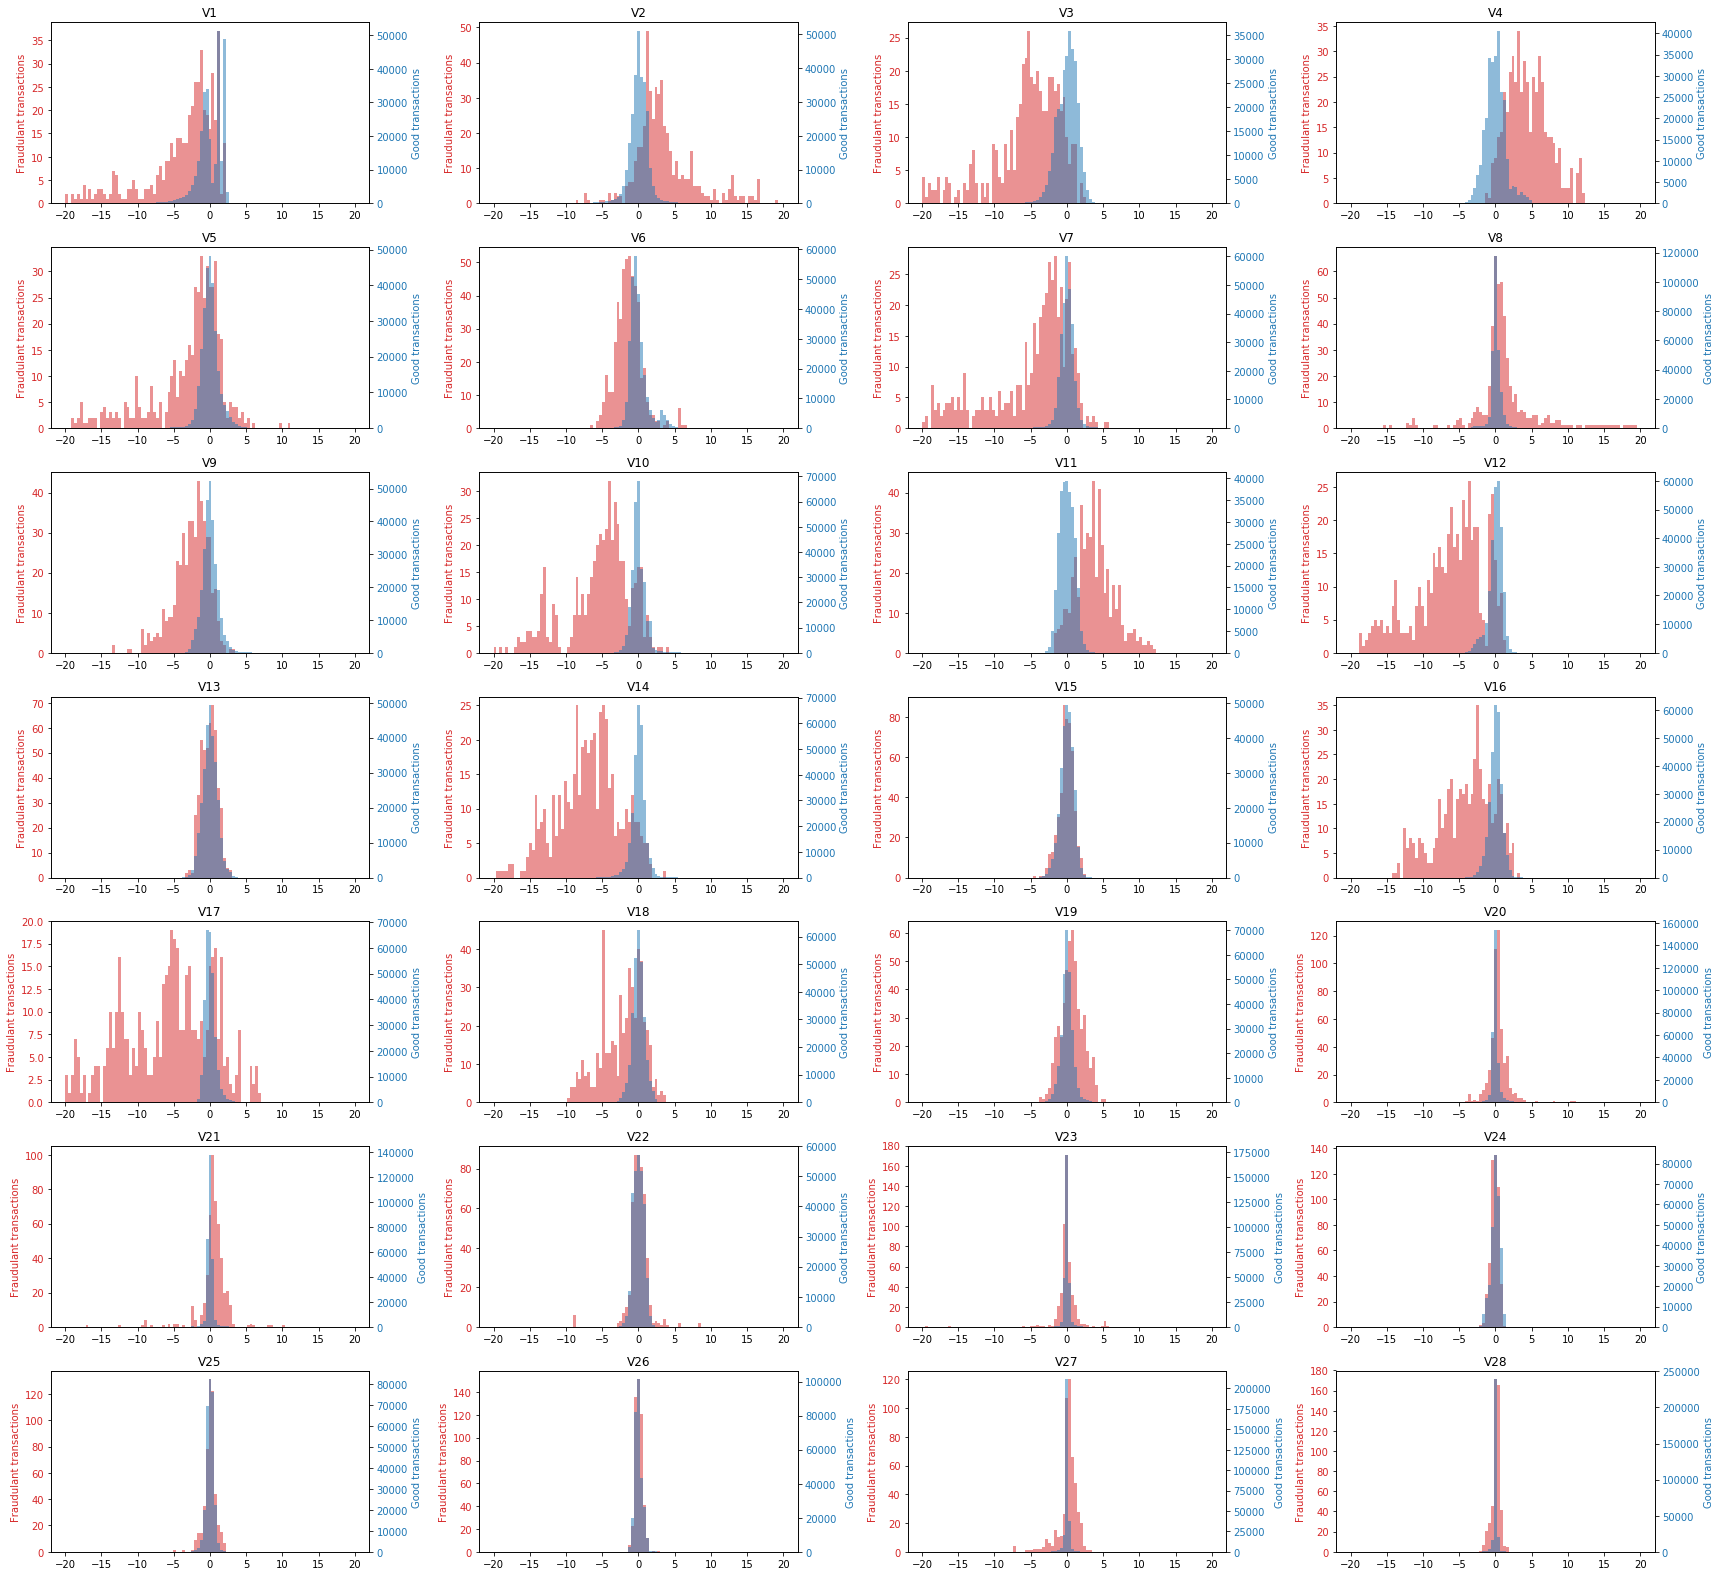

In [5]:
bins = np.linspace(-20, 20, 100)
fig,ax1 = plt.subplots(nrows=7,ncols=4,figsize=(24,22))
k = 0
for i in range(7):
    for j in range(4):
        ax1[i,j].hist(data_fraud.iloc[:,k], bins, alpha=0.5,color='tab:red');
        ax1[i,j].set_ylabel('Fraudulant transactions', color='tab:red', fontsize=10)
        ax1[i,j].tick_params(axis='y', labelcolor='tab:red')
        ax1[i,j].set_title(data_fraud.columns[k])
        ax2 = ax1[i,j].twinx()
        ax2.hist(data_ok.iloc[:,k], bins, alpha=0.5,color='tab:blue');
        #if (j%4==0) :
        ax2.set_ylabel('Good transactions', color='tab:blue', fontsize=10)
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        k+=1
        plt.tight_layout()

From the histograms, the value of each of the 28 variables of the good transactions are limited between -5 and 5. So we can use this information to classify a good from a fraudulous transaction. So the idea would be to see if there is at least one variable of the 28 variables is outside the interval [-5,5]. If it is the case then the transaction is considered fraudulous and if not then it is a good one.  

To have more flexibility in the classifier, we can set the limit as a parameter and the number of hits too. The classifier will work this way for each transaction :
1. Verify how many values in the 28 variables are outside the interval [-limit, limit]. That will give us the number of hits.
2. If the number of hits is above the threshold of hits then the transaction is fraudulous and if not then it is a good transaction.

So to summarize, the classifier has two hyperparameter (limit and thereshold). Now let's define the functions needed.

In [6]:
def fraud_detection(X,limit,threshold):
    '''This function takes as an input the dataframe containing the transactions in each row
    and for all the variables see if there is one of them is out of the range 
    set by [low_lim, high_lim]. The threshhold is another parameter of our classifier
    that allow us to see how many hits a trasactions need to have to decide that it is a 
    fraudulous transaction'''
    
    # Get the number of hits for each row if the dataframe 
    hits = np.sum((abs(X) >= limit).astype(int), axis = 1)
    # If the number of hits is above the specified threshold 
    # then the transaction if a fraud then the output is 1 (fraudulous transacation)
    # otherwise it is 0 (good transaction)
    fraud = (hits >=threshold).astype(int)
    return fraud


def perf_measure(y_actual, y_hat):
    '''This function is to measure the performance of the classifier by
    calculating the precision, recall and f1 '''
    
    TP = 0 # True positive
    FP = 0 # False positive
    TN = 0 # True negative
    FN = 0 # False negative

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2*(recall * precision) / (recall + precision)

    return precision, recall, f1

Now we will split the data into training and testing set. The proportion would be 70% for trainning and 30% for the testing.

In [7]:
# Mask for the good/fraudulous transactions to split the data frames into
# train/test dataframes. We gat 70% of the data to train the classifier
msk_ok = np.random.rand(len(data_ok)) < 0.7
msk_fraud = np.random.rand(len(data_fraud)) < 0.7

# Splitting the datasets
train_data_ok = data_ok[msk_ok]
test_data_ok = data_ok[~msk_ok]

train_data_fraud = data_fraud[msk_fraud]
test_data_fraud = data_fraud[~msk_fraud]

# Concatenate the two dataframes and then shuffle them
train_data = pd.concat([train_data_ok, train_data_fraud])
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = pd.concat([test_data_ok, test_data_fraud]) 
test_data = test_data.sample(frac=1).reset_index(drop=True)


X_train = train_data.loc[:, train_data.columns != 'Class'].values
y_train = train_data['Class'].values

X_test = test_data.loc[:, test_data.columns != 'Class'].values
y_test = test_data['Class'].values

In [8]:
limit = 5; 
threshold = 10
y_pred_train = fraud_detection(X_train,limit,threshold)
precision, recall, f1 = perf_measure(y_train, y_pred_train)

print('Performance of the classifier using the training data:')
print('Precision : %f' % precision)
print('Recall : %f' %recall)
print('F1 score : %f' %f1)
print('-'*40)

y_pred_test = fraud_detection(X_test,limit,threshold)
precision, recall, f1 = perf_measure(y_test, y_pred_test)

print('Performance of the classifier using the test data:')
print('Precision : %f' %precision)
print('Recall : %f' %recall)
print('F1 score : %f' %f1)
print('-'*40)

Performance of the classifier using the training data:
Precision : 0.581818
Recall : 0.278261
F1 score : 0.376471
----------------------------------------
Performance of the classifier using the test data:
Precision : 0.567164
Recall : 0.258503
F1 score : 0.355140
----------------------------------------


Based on those results, we can tell that the classifier gives results that make sense and there is similar results between the training and testing data sets. 
Now, we can do a grid search ton find what would be the best combination of the hyperparameters of the classifier (limit and thereshold) that gives the best results on the training dataset.

In [9]:
def grid_search_func(param1,param2):
    '''This function helpa gets the precision and recall for different values
    of the limit and thereshold parameter to find the best setting that gives an 
    optimal value for the hyperparameters of the classifier'''
    
    t = 0
    perform_matrix = np.zeros((param1.shape[0]*param2.shape[0],5))
    for i in range(param1.shape[0]):
        for j in range(param2.shape[0]):
            y_pred = fraud_detection(X_train, param1[i], param2[j])
            precision, recall, f1 = perf_measure(y_train, y_pred)
            perform_matrix[t,:] = [param1[i], param2[j], precision, recall, f1]
            t+=1
    return perform_matrix

Using the grid_search function, we can get the precision/recall/f1 for different combinations of the limit and theshold parameter to see which one gives the best results.

In [10]:
limit_vector = np.arange(3,6,0.5)
threshold_vector = np.arange(1,15,2)

perf_matrix = grid_search_func(limit_vector,threshold_vector)

Now that we have the performance matrix that contains the precision/recall/f1 for each combination of limit/threshold, we can plot the precision/recall for different limits. For each specific limit,

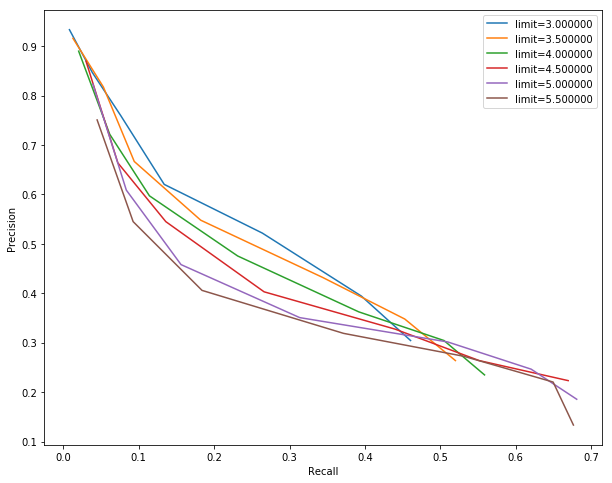

In [11]:
fig = plt.figure(figsize=(10,8))

for i in range(len(limit_vector)):
    plt.plot(perf_matrix[np.where(perf_matrix[:,0] == limit_vector[i])][:,2],
                perf_matrix[np.where(perf_matrix[:,0] == limit_vector[i])][:,3], 
                label = 'limit=%f' %limit_vector[i]);

plt.xlabel('Recall');
plt.ylabel('Precision');
plt.legend();

The behavior seen on the graph is typical to assess the performance of a classifier. It is always a tradeoff between precision and recall. The F1 score comes in place to help make that decision.

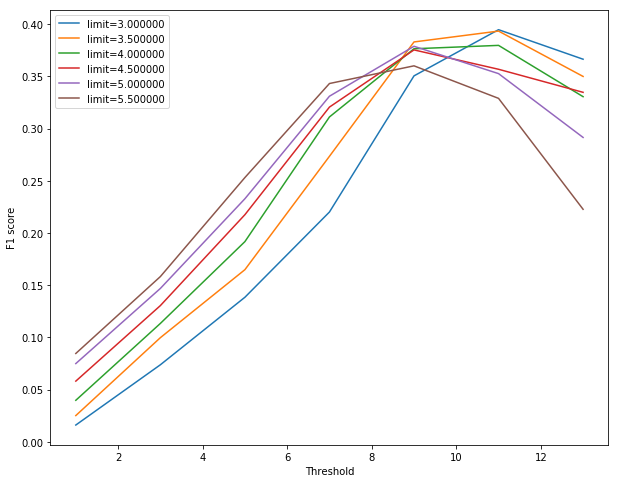

In [12]:
fig = plt.figure(figsize=(10,8))

for i in range(len(limit_vector)):
    plt.plot(perf_matrix[np.where(perf_matrix[:,0] == limit_vector[i])][:,1],
                perf_matrix[np.where(perf_matrix[:,0] == limit_vector[i])][:,4], 
                label = 'limit=%f' %limit_vector[i]);

plt.xlabel('Threshold');
plt.ylabel('F1 score');
plt.legend();

Using the F1 score, we can decide which combination of hyparameters (limit and threshold) give the best performances.

I hope that you find this useful !